In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os 
from os.path import join as pjoin
import glob
import numpy as np
from scipy import linalg as LA
import cv2
from PIL import Image
import time
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18,18)
mpl.rcParams['image.cmap'] = 'inferno'

from utils import *

In [2]:
def imread(imgpath):
    return np.array(Image.open(imgpath))

def get_data_matrix(yale_dataset_path, imgshape, person_id):
    imgpaths = sorted(glob.glob(pjoin(yale_dataset_path,
                                      'subject{:02}*'.format(person_id))))
    n = len(imgpaths)
    img = imread(imgpaths[0])
    X = img.reshape((-1,1))
    for imgpath in imgpaths[1:n]:
        img = imread(imgpath)
        img_vec = img.reshape((-1,1))
        X = np.hstack((X, img_vec))
    return X

In [3]:
yale_dataset_path = 'data/yalefaces'
imgshape = np.array([243,320])

# yale_dataset_path = 'data/yalefaces/centered/'
# imgshape = np.array([231, 195])

X = get_data_matrix(yale_dataset_path, imgshape, 11)

In [4]:
SVD, RPCA, ROSL = {}, {}, {}

# Single pass

## SVD

In [5]:
### PARAMS
r = 1
##########

SVD['A'], SVD['E'] = bmSVD(X, r)

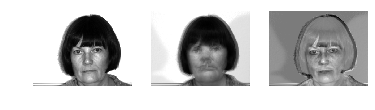

In [6]:
stack_images((X, SVD['A'], SVD['E']), k=1, imgshape=imgshape)

## RPCA

In [7]:
### PARAMS
mu = 0.0001
lmbda = 0.01
##########
    
RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)

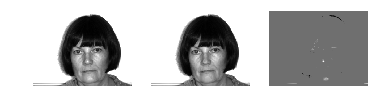

In [8]:
stack_images((X, RPCA['A'], RPCA['E']), k=1, imgshape=imgshape)

## ROSL

In [9]:
### PARAMS
k = 4
reg = 0.04
tol = 1e-06
iters = 500
##########

ROSL['A'], ROSL['E'] = bmROSL(X, k, reg, tol, iters)

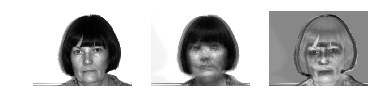

In [10]:
stack_images((X, ROSL['A'], ROSL['E']), k=1, imgshape=imgshape)

# Visual comparison

## Full images

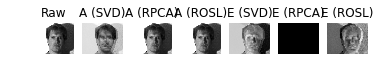

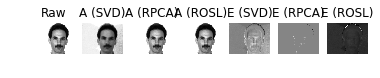

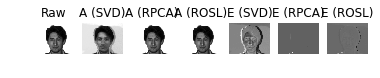

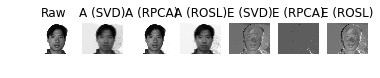

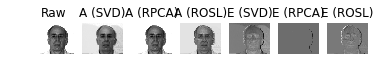

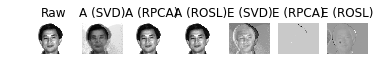

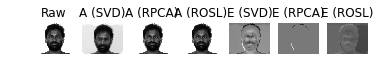

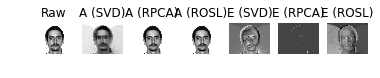

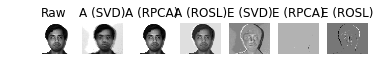

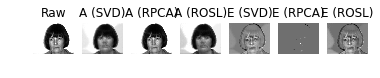

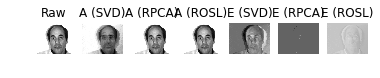

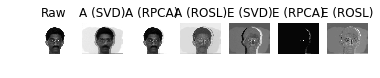

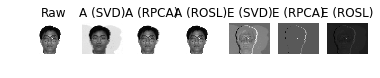

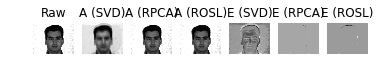

In [11]:
yale_dataset_path = 'data/yalefaces'
imgshape = np.array([243,320])
person_ids = set([os.path.splitext(os.path.split(s)[1])[0][-2:]
                  for s in sorted(glob.glob(pjoin(yale_dataset_path, 'subject*')))])
person_ids = sorted(list(map(int, person_ids)))
captions = ['Raw', 'A (SVD)', 'A (RPCA)', 'A (ROSL)',
                   'E (SVD)', 'E (RPCA)', 'E (ROSL)']
for person_id in person_ids:
    X = get_data_matrix(yale_dataset_path, imgshape, person_id)
    SVD['A'], SVD['E'] = bmSVD(X, r)
    RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)
    ROSL['A'], ROSL['E'] = bmROSL(X, k, reg, tol, iters)
    stack_images((X, SVD['A'], RPCA['A'], ROSL['A'], 
                     SVD['E'], RPCA['E'], ROSL['E']),
                 k=1, imgshape=imgshape, captions=captions)

## Centered images

In [12]:
yale_dataset_path = 'data/yalefaces/centered/'
imgshape = np.array([231, 195])
person_ids = np.arange(1,16)
captions = ['Raw', 'A (SVD)', 'A (RPCA)', 'A (ROSL)',
                   'E (SVD)', 'E (RPCA)', 'E (ROSL)']

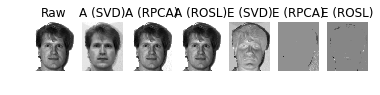

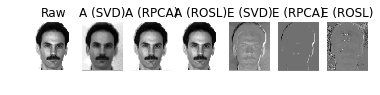

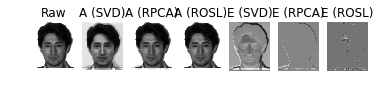

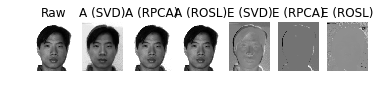

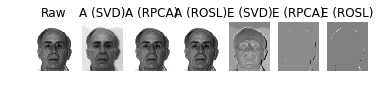

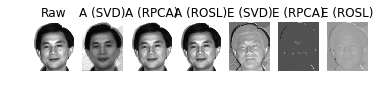

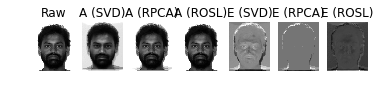

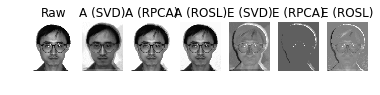

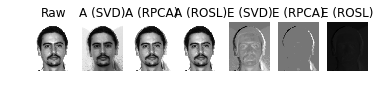

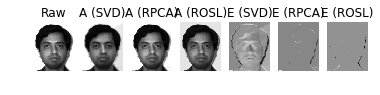

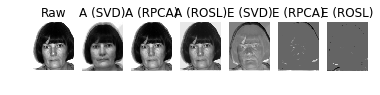

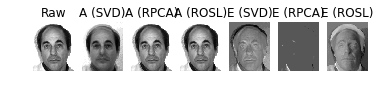

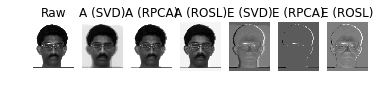

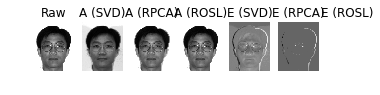

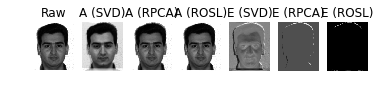

In [13]:
for person_id in person_ids:
    X = get_data_matrix(yale_dataset_path, imgshape, person_id)
    SVD['A'], SVD['E'] = bmSVD(X, r)
    RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)
    ROSL['A'], ROSL['E'] = bmROSL(X, k, reg, tol, iters)
    stack_images((X, SVD['A'], RPCA['A'], ROSL['A'], 
                     SVD['E'], RPCA['E'], ROSL['E']),
                 k=1, imgshape=imgshape, captions=captions)

# Time comparison

In [14]:
k = 4
n_it = 1
timeSVD, timeRPCA, timeROSL = [], [], []
for person_id in person_ids:
    X = get_data_matrix(yale_dataset_path, imgshape, person_id)
    tSVD = getMeanTime(bmSVD, (X, k), n_it)
    tRPCA = getMeanTime(bmRPCA, (X, mu, lmbda), n_it)
    tROSL = getMeanTime(bmROSL, (X, k, reg, tol, iters), n_it)
    timeSVD.append(tSVD)
    timeRPCA.append(tRPCA)
    timeROSL.append(tROSL)

In [15]:
print('Mean exectution time:\n\tSVD\t{:.4f}s\n\tRPCA\t{:.4f}s\n\tROSL\t{:.4f}s'\
      .format(np.mean(timeSVD), np.mean(tRPCA), np.mean(tROSL)))

Mean exectution time:
	SVD	0.0042s
	RPCA	0.3397s
	ROSL	0.3387s
